In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Data Preprocessing

In [2]:
df = pd.read_csv('p1_movie_metadata.csv')
df.head()
# df.shape

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
# removing duplicate entries
df.duplicated().sum()
df = df.drop_duplicates()
df.shape
df.head(148)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Color,David Bowers,135.0,85.0,42.0,586.0,Kate Winslet,20000.0,64459316.0,Adventure|Animation|Comedy|Family,...,122.0,English,UK,PG,149000000.0,2006.0,14000.0,6.7,1.85,0
145,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
146,Color,Rob Minkoff,196.0,92.0,50.0,517.0,Zach Callison,3000.0,111505642.0,Adventure|Animation|Comedy|Family|Sci-Fi,...,130.0,English,USA,PG,145000000.0,2014.0,1000.0,6.9,1.85,11000
147,Color,Wolfgang Petersen,220.0,196.0,249.0,844.0,Orlando Bloom,11000.0,133228348.0,Adventure,...,1694.0,English,USA,R,175000000.0,2004.0,5000.0,7.2,2.35,0


In [5]:
# removing unwanted columns
data=df.drop(['color','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes',
          'actor_2_facebook_likes','movie_facebook_likes','aspect_ratio','duration',               
          'facenumber_in_poster','cast_total_facebook_likes','actor_3_name','plot_keywords','movie_imdb_link','country','budget','gross'],axis=1)
data.head()

,director_name,num_critic_for_reviews,actor_2_name,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,content_rating,title_year,imdb_score
0,James Cameron,723.0,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,PG-13,2009.0,7.9
1,Gore Verbinski,302.0,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238.0,English,PG-13,2007.0,7.1
2,Sam Mendes,602.0,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994.0,English,PG-13,2015.0,6.8
3,Christopher Nolan,813.0,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701.0,English,PG-13,2012.0,8.5
4,Doug Walker,NaN,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,NaN,NaN,NaN,NaN,7.1


In [6]:
data.isnull().sum()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           4895 non-null   object 
 1   num_critic_for_reviews  4949 non-null   float64
 2   actor_2_name            4985 non-null   object 
 3   genres                  4998 non-null   object 
 4   actor_1_name            4991 non-null   object 
 5   movie_title             4998 non-null   object 
 6   num_voted_users         4998 non-null   int64  
 7   num_user_for_reviews    4977 non-null   float64
 8   language                4986 non-null   object 
 9   content_rating          4697 non-null   object 
 10  title_year              4891 non-null   float64
 11  imdb_score              4998 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 507.6+ KB


In [7]:
data=data.dropna(axis=0,subset=['genres','director_name','title_year'])
data.shape
# data.isnull().sum()


(4891, 12)

In [8]:
# handling missing values of important features which can't be dropped

data['actor_1_name']=data['actor_1_name'].mode()[0]
data['actor_2_name']=data['actor_2_name'].mode()[0]

data.isnull().sum()
unique_directors = df['director_name'].nunique()
print("Number of unique directors:", unique_directors)

data.isnull().sum()


Number of unique directors: 2398


director_name               0
num_critic_for_reviews     40
actor_2_name                0
genres                      0
actor_1_name                0
movie_title                 0
num_voted_users             0
num_user_for_reviews       15
language                    9
content_rating            259
title_year                  0
imdb_score                  0
dtype: int64

# Statistical Analysis

In [9]:
data.describe()

,num_critic_for_reviews,num_voted_users,num_user_for_reviews,title_year,imdb_score
count,4851.000000,4.891000e+03,4876.000000,4891.000000,4891.000000
mean,142.235828,8.465674e+04,275.768663,2002.468820,6.416479
std,121.509947,1.391999e+05,380.459777,12.475235,1.113429
min,1.000000,5.000000e+00,1.000000,1916.000000,1.600000
25%,52.000000,8.908500e+03,67.000000,1999.000000,5.800000
50%,112.000000,3.491000e+04,159.000000,2005.000000,6.500000
75%,196.000000,9.773600e+04,331.000000,2011.000000,7.200000
max,813.000000,1.689764e+06,5060.000000,2016.000000,9.300000


In [10]:
data.columns

Index(['director_name', 'num_critic_for_reviews', 'actor_2_name', 'genres',
       'actor_1_name', 'movie_title', 'num_voted_users',
       'num_user_for_reviews', 'language', 'content_rating', 'title_year',
       'imdb_score'],
      dtype='object')

C:\Users\Asus\AppData\Local\Temp\ipykernel_21208\2115156620.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


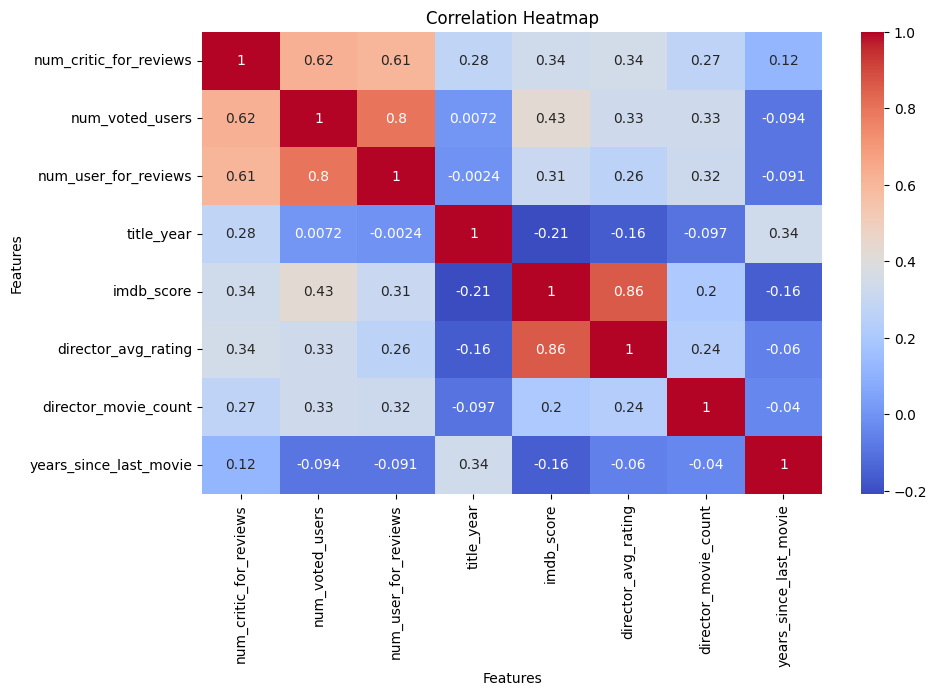

In [11]:
# feature engineering
data['director_avg_rating'] = data.groupby('director_name')['imdb_score'].transform('mean')
data['director_movie_count'] = data.groupby('director_name')['movie_title'].transform('count')
data['years_since_last_movie'] = data.groupby('director_name')['title_year'].diff().fillna(0)

correlation = data.corr()
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Create heatmap with color gradient and annotation for clarity
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

plt.show()


In [12]:

# Split the data into features and target variables
X = data[['director_name', 'num_critic_for_reviews', 'actor_2_name', 'actor_1_name', 
            'num_voted_users', 'num_user_for_reviews', 'language', 'content_rating', 'imdb_score', 
            'director_avg_rating', 'director_movie_count', 'years_since_last_movie']]
# X = data[['director_name',  'director_avg_rating', 'director_movie_count', 'years_since_last_movie','content_rating', 'num_voted_users','num_user_for_reviews','num_critic_for_reviews' ,'imdb_score']]

y_release_year = data['title_year']
y_genres = data['genres']

genres = data['genres'].str.get_dummies('|')

# split the data into training and testing sets
X_train, X_test, y_release_year_train, y_release_year_test, y_genres_train, y_genres_test = train_test_split(
    X, y_release_year, genres, test_size=0.2, random_state=42)

# preproccessing pipeline for numerical and categorical features
numeric_features = ['director_avg_rating','num_critic_for_reviews','num_voted_users','num_user_for_reviews', 'director_movie_count', 'years_since_last_movie','imdb_score']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_features = ['director_name','content_rating','language']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# model development
release_year_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=10, random_state=42)
)])

genres_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputRegressor(XGBClassifier(random_state=42, max_depth=20)))])

# model training
release_year_model.fit(X_train, y_release_year_train)
genres_model.fit(X_train, y_genres_train)

# model evaluation
release_year_pred = release_year_model.predict(X_test)
genres_pred = genres_model.predict(X_test)

release_year_mae = mean_absolute_error(y_release_year_test, release_year_pred)
genres_pred_df = pd.DataFrame(genres_pred, index=y_genres_test.index, columns=y_genres_test.columns)
genres_f1 = f1_score(y_genres_test, genres_pred_df, average='micro')

print(f"Release Year Prediction MAE: {release_year_mae}")
print(f"Genres Prediction F1 Score: {genres_f1}")


Release Year Prediction MAE: 4.136292602614306
Genres Prediction F1 Score: 0.47411210954214805
